In [205]:
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt

In [206]:
import numpy as np
def getUpperAndLowerOutlierThreshold(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    upperOutlier = q75 + iqr*1.5
    lowerOutlier = q25 - iqr*1.5
    return upperOutlier,lowerOutlier

In [207]:
colnames=['A','EDA', 'BVP', 'TEMP', 'EMG','NA'] 
labels = ['','EDA: electrodermal activity','BVP : Blood Volume pressure','TEMP:Temprature','EMG: Electrmygraphy','']

In [208]:
patientData = pd.read_table('//opensignals_000780589BB3_2016-04-02_22-21-24.txt',skiprows=3,header=None,names=colnames)

In [209]:
patientData.head()

,A,EDA,BVP,TEMP,EMG,NA
0,0,8554,38892,27877,32716,NaN
1,0,8557,38208,27881,32863,NaN
2,0,8552,38612,27828,32705,NaN
3,0,8550,38460,27828,32901,NaN
4,0,8553,38444,27951,32769,NaN


In [210]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830750 entries, 0 to 4830749
Data columns (total 6 columns):
A       int64
EDA     int64
BVP     int64
TEMP    int64
EMG     int64
NA      float64
dtypes: float64(1), int64(5)
memory usage: 258.0 MB


In [211]:
features=['EDA', 'BVP', 'TEMP', 'EMG']
patientData = patientData[features]

In [212]:
patientData.describe()

,EDA,BVP,TEMP,EMG
count,4.830750e+06,4.830750e+06,4.830750e+06,4.830750e+06
mean,9.445235e+03,3.244875e+04,2.654954e+04,3.278219e+04
std,5.130711e+03,6.656131e+03,6.723459e+02,1.139080e+02
min,5.138000e+03,1.960000e+02,2.483000e+04,2.366000e+04
25%,6.584000e+03,3.210500e+04,2.606800e+04,3.269700e+04
50%,6.992000e+03,3.239900e+04,2.645500e+04,3.278100e+04
75%,1.058900e+04,3.263000e+04,2.711300e+04,3.286800e+04
max,3.191200e+04,6.537300e+04,2.825200e+04,3.885600e+04


In [213]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830750 entries, 0 to 4830749
Data columns (total 4 columns):
EDA     int64
BVP     int64
TEMP    int64
EMG     int64
dtypes: int64(4)
memory usage: 184.3 MB


In [214]:
%matplotlib inline

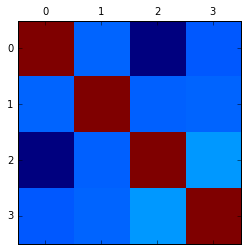

In [215]:
plt.matshow(patientData.corr())

In [216]:
#Correlation among columns
patientData.corr()

,EDA,BVP,TEMP,EMG
EDA,1.000000,-0.002416,-0.291290,-0.014381
BVP,-0.002416,1.000000,-0.007990,-0.000072
TEMP,-0.291290,-0.007990,1.000000,0.062825
EMG,-0.014381,-0.000072,0.062825,1.000000


In [217]:
patientData.cov()

,EDA,BVP,TEMP,EMG
EDA,2.632420e+07,-8.252003e+04,-1.004838e+06,-8404.403683
BVP,-8.252003e+04,4.430407e+07,-3.575762e+04,-54.923432
TEMP,-1.004838e+06,-3.575762e+04,4.520490e+05,4811.485053
EMG,-8.404404e+03,-5.492343e+01,4.811485e+03,12975.027422


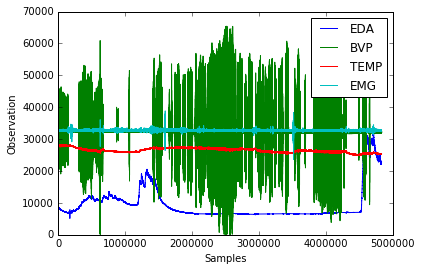

In [218]:
#plt.subplot(411)
plt.plot(patientData['EDA'])
plt.plot(patientData['BVP'])
plt.plot(patientData['TEMP'])
plt.plot(patientData['EMG'])
plt.legend(['EDA','BVP','TEMP','EMG'])

plt.ylabel("Observation")
plt.xlabel("Samples")

plt.savefig('all_test_plot.png', dpi=300)

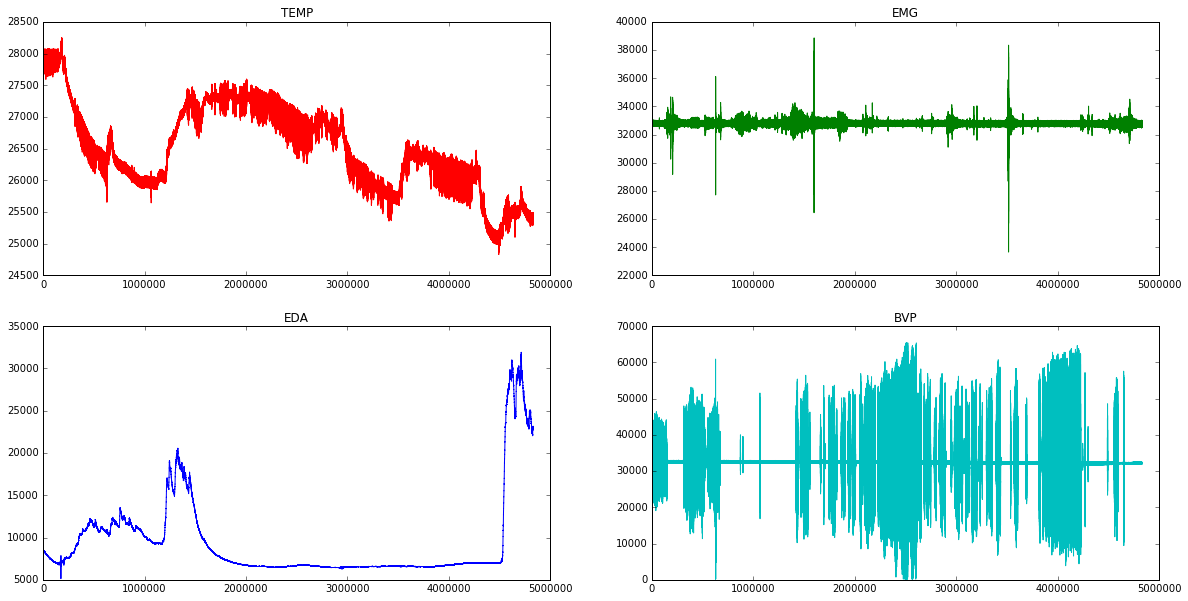

In [219]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=[i for i in plotIndex]

index=0
ax1.plot(patientData[plotIndex[index]],color=colormap[index])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.plot(patientData[plotIndex[index]],color=colormap[index])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.plot(patientData[plotIndex[index]],color=colormap[index])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.plot(patientData[plotIndex[index]],color=colormap[index])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])

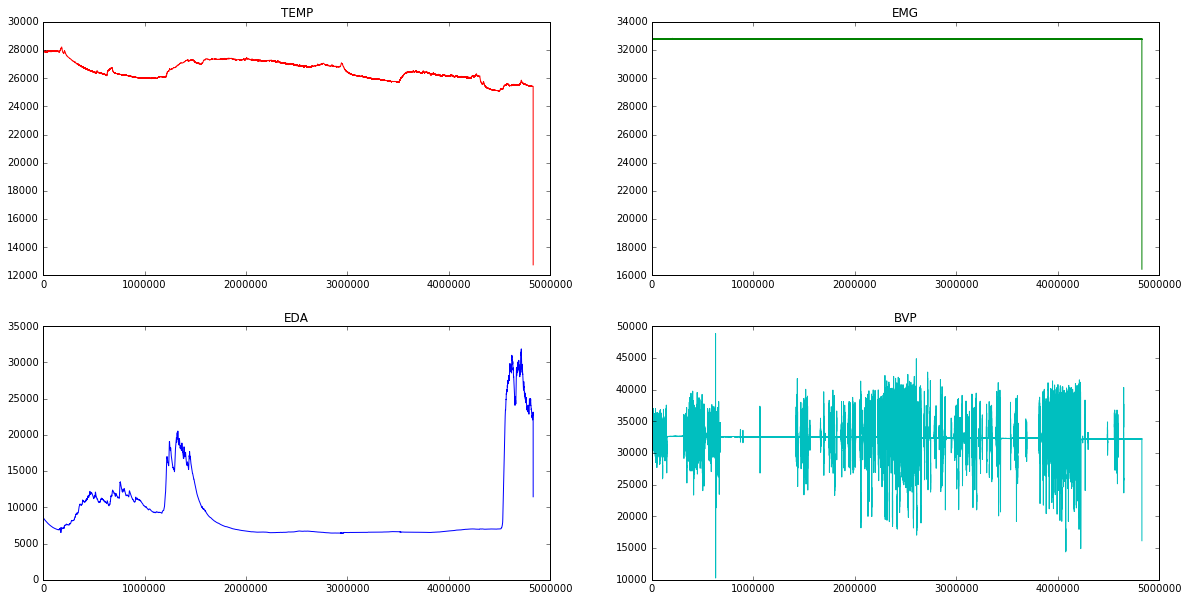

In [220]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=plotIndex
maInterval = 600
def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
    #cumsum = np.cumsum(np.insert(interval, 0, 0)) 
    #return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

index=0
ax1.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])

plt.savefig('all_test_ma_plot.png', dpi=300)

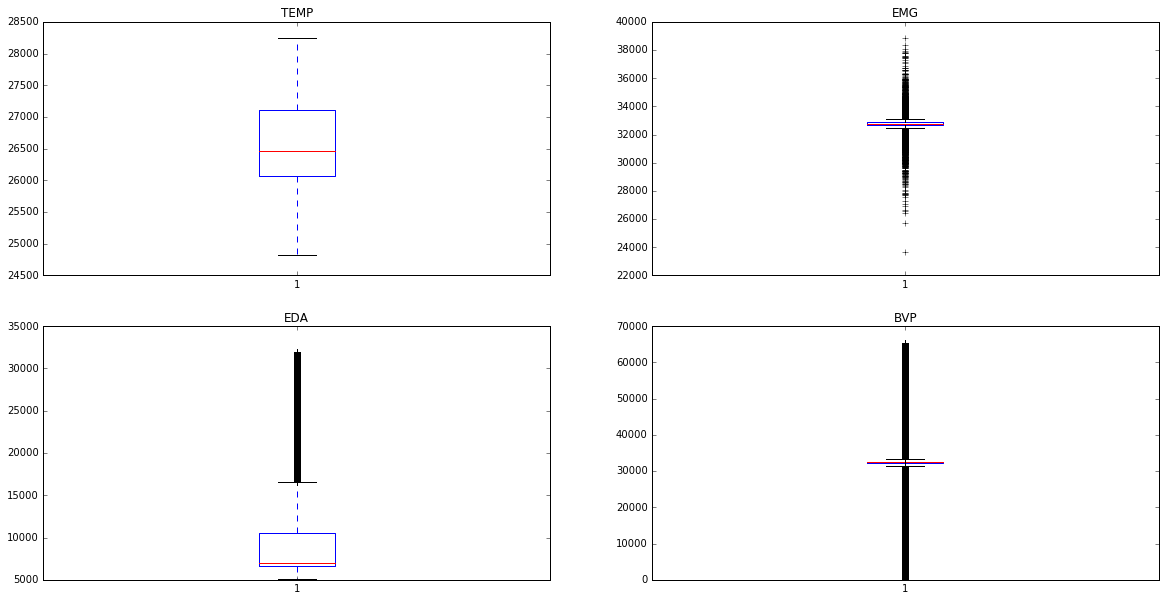

In [221]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=plotIndex
maInterval = 600
def moving_average(interval, window_size):
    #window= np.ones(int(window_size))/float(window_size)
    #return np.convolve(interval, window, 'same')
    return interval

index=0
ax1.boxplot(moving_average(patientData[plotIndex[index]],maInterval))
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.boxplot(moving_average(patientData[plotIndex[index]],maInterval))
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.boxplot(moving_average(patientData[plotIndex[index]],maInterval))
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.boxplot(moving_average(patientData[plotIndex[index]],maInterval))
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])

In [222]:
noOfSamples = 600
patientData_ma = patientData.apply(lambda x: moving_average(x,noOfSamples))

In [223]:
patientData_ma.corr()

,EDA,BVP,TEMP,EMG
EDA,1.000000,-0.002416,-0.291290,-0.014381
BVP,-0.002416,1.000000,-0.007990,-0.000072
TEMP,-0.291290,-0.007990,1.000000,0.062825
EMG,-0.014381,-0.000072,0.062825,1.000000


In [190]:
'''
plt.hist(patientData['EDA'])
plt.xlabel('#EDA')
plt.ylabel('#Total')
'''
print (patientData_ma.head())
print (patientData.head())

from statsmodels.tsa.ar_model import AR
import numpy as np

signal = np.ones(20)
ar_mod = AR(signal)
ar_res = ar_mod.fit(4)

print (ar_res.predict(4, 60))

           EDA           BVP          TEMP           EMG
0  4275.168333  15275.163333  13945.948333  16393.403333
1  4289.416667  15318.388333  13992.301667  16447.798333
2  4303.663333  15362.303333  14038.850000  16502.553333
3  4317.913333  15406.283333  14085.410000  16557.101667
4  4332.156667  15450.231667  14132.023333  16611.590000
    EDA    BVP   TEMP    EMG
0  8554  38892  27877  32716
1  8557  38208  27881  32863
2  8552  38612  27828  32705
3  8550  38460  27828  32901
4  8553  38444  27951  32769


ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

(array([  1.00000000e+00,   4.00000000e+00,   1.30000000e+01,
          6.10000000e+01,   3.20000000e+02,   2.37544800e+06,
          2.45461600e+06,   2.31000000e+02,   4.10000000e+01,
          1.50000000e+01]),
 array([ 23660. ,  25179.6,  26699.2,  28218.8,  29738.4,  31258. ,
         32777.6,  34297.2,  35816.8,  37336.4,  38856. ]),
 <a list of 10 Patch objects>)

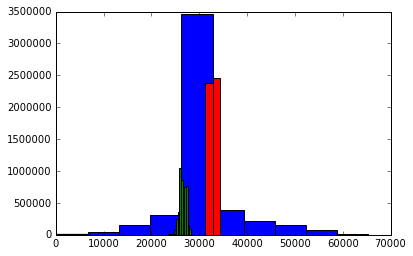

In [28]:
plt.hist(patientData['BVP'])


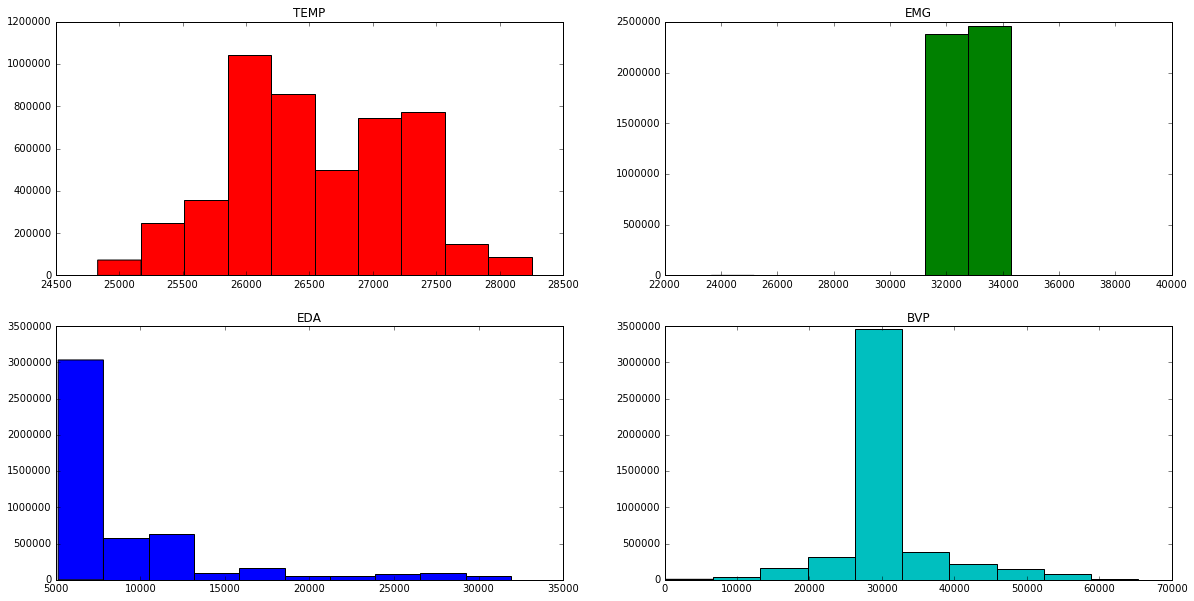

In [171]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=plotIndex

index=0
ax1.hist(patientData[plotIndex[index]],color=colormap[index])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.hist(patientData[plotIndex[index]],color=colormap[index])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.hist(patientData[plotIndex[index]],color=colormap[index])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.hist(patientData[plotIndex[index]],color=colormap[index])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])



In [51]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

km.fit(patientData)

prediction = km.predict(patientData)

TypeError: scatter() missing 1 required positional argument: 'y'

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca1=pca.fit(patientData)
pca_2d = pca.transform(patientData)

In [55]:
pca_2d.shape

(4830750, 2)

In [86]:
km = KMeans(n_clusters = 2)

km.fit(patientData)

prediction = km.predict(patientData)

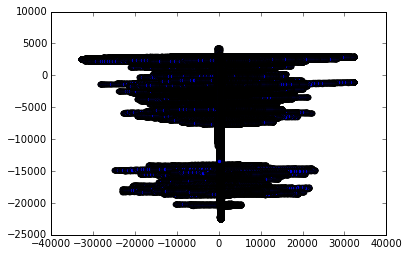

In [71]:
plt.scatter(pca_2d[:,0],pca_2d[:,1])
#pca_2d[:,0]

In [94]:
prediction[prediction == 1]
#plt.scatter(prediction)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [81]:
pca.components_

array([[  4.54968333e-03,  -9.99989397e-01,   7.11147468e-04,
          4.53973118e-07],
       [ -9.99238375e-01,  -4.51870364e-03,   3.87575110e-02,
          3.25798424e-04]])

In [ ]:
#plt.scatter(patientData['EDA'],patientData['TEMP'])
plt.scatter(patientData['EMG'],x)


In [164]:
upperOutlier,lowerOutlier = getUpperAndLowerOutlierThreshold(patientData['EDA'])

In [165]:
print (upperOutlier, lowerOutlier)

16596.5 576.5


In [112]:
print (patientData.shape)
print (patientData[((patientData['EDA'] < upperOutlier) & (patientData['EDA'] > lowerOutlier ))].shape)

(4830750, 4)
(4385744, 4)


In [169]:
for i in features:
    upperOutlier,lowerOutlier = getUpperAndLowerOutlierThreshold(patientData[i])
    print("="*80)
    print (i)
    print(patientData[i].describe())
    print (upperOutlier, lowerOutlier)
    totalLen = patientData.shape[0]
    afterRemovingOutliers = (patientData[((patientData[i] < upperOutlier) & (patientData[i] > lowerOutlier ))].shape)[0]
    percentageOfOutliers = ( (totalLen - afterRemovingOutliers) / totalLen)*100
    print ("Outliers={} %".format(percentageOfOutliers))
    print ()
    

EDA
count    4.830750e+06
mean     9.445235e+03
std      5.130711e+03
min      5.138000e+03
25%      6.584000e+03
50%      6.992000e+03
75%      1.058900e+04
max      3.191200e+04
Name: EDA, dtype: float64
16596.5 576.5
Outliers=9.21194431506495 %

BVP
count    4.830750e+06
mean     3.244875e+04
std      6.656131e+03
min      1.960000e+02
25%      3.210500e+04
50%      3.239900e+04
75%      3.263000e+04
max      6.537300e+04
Name: BVP, dtype: float64
33417.5 31317.5
Outliers=33.94553640739016 %

TEMP
count    4.830750e+06
mean     2.654954e+04
std      6.723459e+02
min      2.483000e+04
25%      2.606800e+04
50%      2.645500e+04
75%      2.711300e+04
max      2.825200e+04
Name: TEMP, dtype: float64
28680.5 24500.5
Outliers=0.0 %

EMG
count    4.830750e+06
mean     3.278219e+04
std      1.139080e+02
min      2.366000e+04
25%      3.269700e+04
50%      3.278100e+04
75%      3.286800e+04
max      3.885600e+04
Name: EMG, dtype: float64
33124.5 32440.5
Outliers=0.5790198209387776 %



In [134]:
# There is no correlation between any of channel data
# Temp data has no outliers; data is nicely spread out
# BVP has highest outliers

print (patientData.shape[0])
print (patientData['BVP'].head())
#km = KMeans(n_clusters = 2)

#km.fit(patientData)

#prediction = km.predict(patientData)

4830750
0    38892
1    38208
2    38612
3    38460
4    38444
Name: BVP, dtype: int64


In [136]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
#data = scale(digits.data)
data=patientData

n_samples, n_features = data.shape
#n_digits = len(np.unique(digits.target))
n_digits=7
#labels = digits.target
labels = features

sample_size = patientData.shape[0]

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


Automatically created module for IPython interactive environment
n_digits: 7, 	 n_samples 4830750, 	 n_features 4
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette


ValueError: labels_true and labels_pred must have same size, got 4 and 4830750